In [1]:
import sys
import numpy as np
from numba import njit
import scipy
from matplotlib import pyplot as plt

source = "../source"
sys.path.append(source)

import publication

In [2]:
def der(t, z, eta):
    """Right hand side of the 2 data point system."""
    a, b = z
    return [
        -eta * (2 * a**3 + 2 * a * b - a + b + 1),
        -eta * (a**2 + a + 2 * b),
    ]


def sim(t_max, a0, b0, eta):
    """Return solution of the 3d ode system."""

    sol = scipy.integrate.solve_ivp(
        der,
        [0, t_max],
        [a0, b0],
        method="Radau",
        t_eval=np.linspace(0, t_max, 10000),
        args=(eta,),
        dense_output=False,
    )
    t = sol.t
    a, b = sol.y
    return t, a, b

/tmp/ipykernel_1008/1804189307.py:11: RuntimeWarning: invalid value encountered in divide
  da, db = da / norm, db / norm


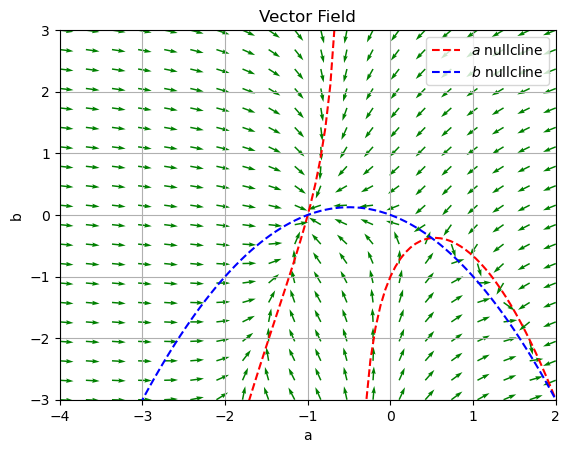

In [3]:
c = 3
c_a, c_b = -1, 0
A = np.linspace(-c + c_a, c + c_a, 20)
B = np.linspace(-c + c_b, c + c_b, 20)
t = np.linspace(0, 10, 100)
eta = 1

d = np.array([[der(t, (a, b), eta) for a in A] for b in B])
da, db = d[:, :, 0], d[:, :, 1]
norm = np.sqrt(da**2 + db**2)
da, db = da / norm, db / norm

x, y = np.meshgrid(A, B)
plt.quiver(x, y, da, db, color="g")
plt.title("Vector Field")
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))

# a0, b0 = 0, 0
# t, a, b = sim(t_max=10, a0=a0, b0=b0, eta=eta)
# plt.scatter(a, b, s=5)
# plt.scatter(a0, b0, s=10, c="black")

# publication.set_color_gradient(0, len(a))
# for n in range(len(a)):
#     plt.scatter(a[n], b[n], s=5)

A_null = np.linspace(np.min(A), np.max(A), 100)
B_a_null = (-2 * A_null**3 + A_null - 1) / (2 * A_null + 1)
plt.plot(
    A_null[A_null < -0.5],
    B_a_null[A_null < -0.5],
    linestyle="--",
    color="r",
    label=r"$a$ nullcline",
)
plt.plot(
    A_null[A_null > -0.5],
    B_a_null[A_null > -0.5],
    linestyle="--",
    color="r",
)

plt.plot(
    A_null,
    -0.5 * (A_null**2 + A_null),
    linestyle="--",
    color="b",
    label=r"$b$ nullcline",
)

plt.grid()
plt.legend()
plt.xlabel("a")
plt.ylabel("b")
plt.show()

In [4]:
@njit
def der(t, z, eta, train_data):
    """Right hand side of the 2 data point system."""
    a, b = z
    return [
        -eta * sum([n * a ** (n - 1) * (a**n + b - (-1) ** n) for n in train_data]),
        -eta * sum([a**n + b - (-1) ** n for n in train_data]),
    ]


def sim(t_max, a0, b0, eta, train_data):
    """Return solution of the 3d ode system."""

    sol = scipy.integrate.solve_ivp(
        der,
        [0, t_max],
        [a0, b0],
        method="Radau",
        t_eval=np.linspace(0, t_max, 1000),
        args=(eta, train_data),
        dense_output=False,
    )
    t = sol.t
    a, b = sol.y
    return t, a, b

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


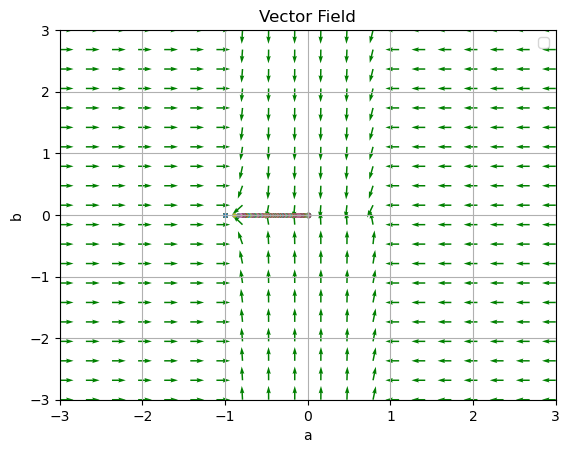

In [5]:
c = 3
c_a, c_b = 0, 0
A = np.linspace(-c + c_a, c + c_a, 20)
B = np.linspace(-c + c_b, c + c_b, 20)
t = np.linspace(0, 10, 10000)
eta = 0.1
train_data = list(range(1, 100 + 1))
# train_data = [2, 3]

d = np.array([[der(t, (a, b), eta, train_data) for a in A] for b in B])
da, db = d[:, :, 0], d[:, :, 1]
norm = np.sqrt(da**2 + db**2)
da, db = da / norm, db / norm

x, y = np.meshgrid(A, B)
plt.quiver(x, y, da, db, color="g")
plt.title("Vector Field")
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))

a0, b0 = 0, 0
t, a, b = sim(t_max=10, a0=a0, b0=b0, eta=eta, train_data=train_data)
plt.scatter(a, b, s=5)
plt.scatter(a0, b0, s=10, c="black")

publication.set_color_gradient(0, len(a))
for n in range(len(a)):
    plt.scatter(a[n], b[n], s=5)

# A_null = np.linspace(np.min(A), np.max(A), 100)
# B_a_null = (-2 * A_null**3 + A_null - 1) / (2 * A_null + 1)
# plt.plot(
#     A_null[A_null < -0.5],
#     B_a_null[A_null < -0.5],
#     linestyle="--",
#     color="r",
#     label=r"$a$ nullcline",
# )
# plt.plot(
#     A_null[A_null > -0.5],
#     B_a_null[A_null > -0.5],
#     linestyle="--",
#     color="r",
# )

# plt.plot(
#     A_null,
#     -0.5 * (A_null**2 + A_null),
#     linestyle="--",
#     color="b",
#     label=r"$b$ nullcline",
# )

plt.grid()
plt.legend()
plt.xlabel("a")
plt.ylabel("b")
plt.show()

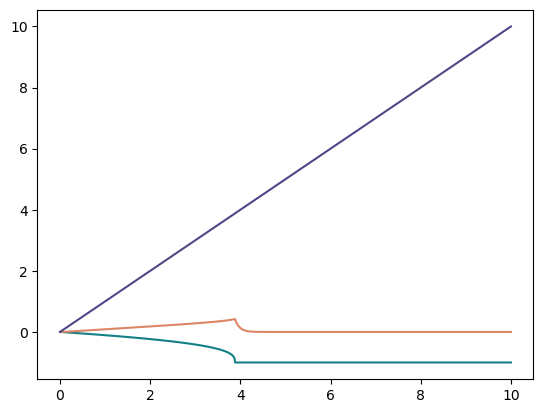

In [30]:
publication.set_color_mixed()
plt.plot(t, a)
plt.plot(t, b * 100)
plt.plot(t, t)
plt.show()